## **Solar Power Output Prediction using Linear Regression Model**

**WEEK 2 EXPLORATORY DATA ANALYSIS**

In [1]:
#import required libraries
import pandas as pd      #df manipulation
import numpy as np       #numerical operations 
import seaborn as sns    #visualization 
import matplotlib.pyplot as plt #visualization

In [2]:
#load the dataset
df = pd.read_csv("D:\\Edunet Internship\\solarpoweropDataset.csv")

In [3]:
#display the first few rows of dataset 
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [4]:
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [5]:
#check for missing values
df.isnull()
#tocheck totally
df.isnull().sum()


temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [6]:
#to check dulicate values
df.duplicated().sum()

0

**STATISTICAL ANALYSIS**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [8]:
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


**OUTLIER ANALYSIS**

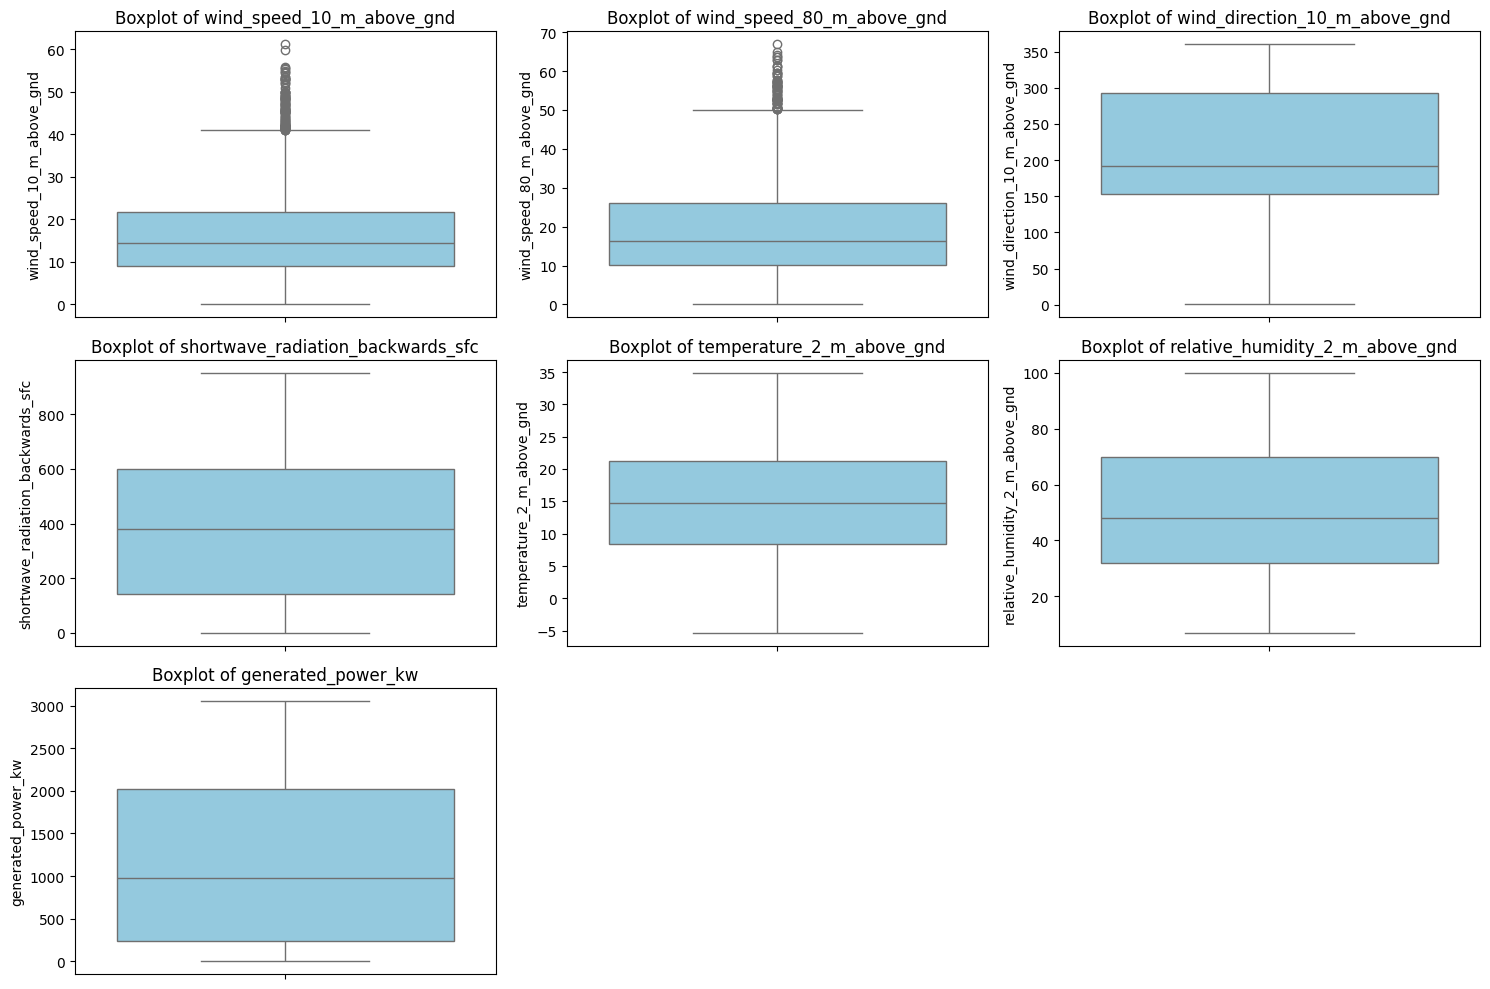

{'wind_speed_10_m_above_gnd': {'Q1': 9.01,
  'Q3': 21.84,
  'IQR': 12.83,
  'Lower Bound': -10.235000000000001,
  'Upper Bound': 41.085,
  'Number of Outliers': 101},
 'wind_speed_80_m_above_gnd': {'Q1': 10.14,
  'Q3': 26.14,
  'IQR': 16.0,
  'Lower Bound': -13.86,
  'Upper Bound': 50.14,
  'Number of Outliers': 74},
 'wind_direction_10_m_above_gnd': {'Q1': 153.19,
  'Q3': 292.07,
  'IQR': 138.88,
  'Lower Bound': -55.129999999999995,
  'Upper Bound': 500.39,
  'Number of Outliers': 0},
 'shortwave_radiation_backwards_sfc': {'Q1': 142.4,
  'Q3': 599.86,
  'IQR': 457.46000000000004,
  'Lower Bound': -543.7900000000001,
  'Upper Bound': 1286.0500000000002,
  'Number of Outliers': 0},
 'temperature_2_m_above_gnd': {'Q1': 8.39,
  'Q3': 21.29,
  'IQR': 12.899999999999999,
  'Lower Bound': -10.959999999999997,
  'Upper Bound': 40.64,
  'Number of Outliers': 0},
 'relative_humidity_2_m_above_gnd': {'Q1': 32.0,
  'Q3': 70.0,
  'IQR': 38.0,
  'Lower Bound': -25.0,
  'Upper Bound': 127.0,
  'Num

In [9]:
#outlier Analysis
# Function to detect and visualize outliers using boxplots
def outlier_analysis(df, variables):
    outlier_stats = {}
    plt.figure(figsize=(15, 10))
    
    for i, var in enumerate(variables, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(data=df, y=var, color='skyblue')
        plt.title(f'Boxplot of {var}')
        
        # Detect outliers using the IQR method
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
        
        outlier_stats[var] = {
            'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
            'Lower Bound': lower_bound, 'Upper Bound': upper_bound,
            'Number of Outliers': len(outliers)
        }
    
    plt.tight_layout()
    plt.show()
    return outlier_stats

# Variables to analyze for outliers
variables_to_analyze = [
    'wind_speed_10_m_above_gnd',
    'wind_speed_80_m_above_gnd',
    'wind_direction_10_m_above_gnd',
    'shortwave_radiation_backwards_sfc',
    'temperature_2_m_above_gnd',
    'relative_humidity_2_m_above_gnd',
    'generated_power_kw'
]

# Perform outlier analysis
outlier_statistics = outlier_analysis(df, variables_to_analyze)
outlier_statistics


**GENERAL ANALYSIS FOR TARGET VARIABLE**

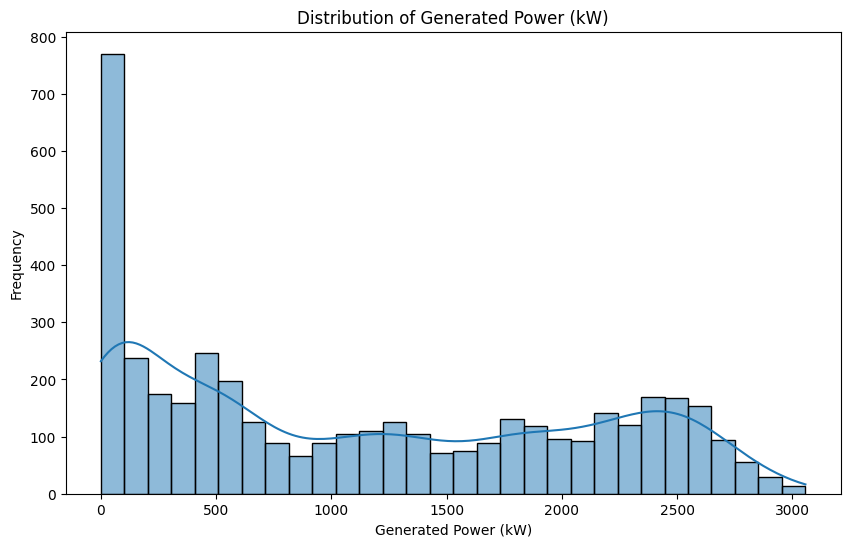

In [10]:
# Plot distribution of power
plt.figure(figsize=(10, 6))
sns.histplot(df['generated_power_kw'], bins=30, kde=True)
plt.title('Distribution of Generated Power (kW)')
plt.xlabel('Generated Power (kW)')
plt.ylabel('Frequency')
plt.show()

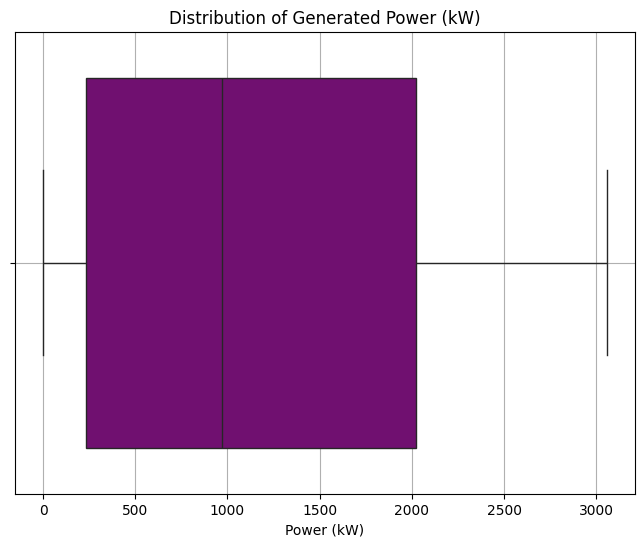

In [11]:
# Box Plot: Power Generation
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['generated_power_kw'], color='purple')
plt.title('Distribution of Generated Power (kW)')
plt.xlabel('Power (kW)')
plt.grid(True)
plt.show()

**UNIVARIATE ANALYSIS**

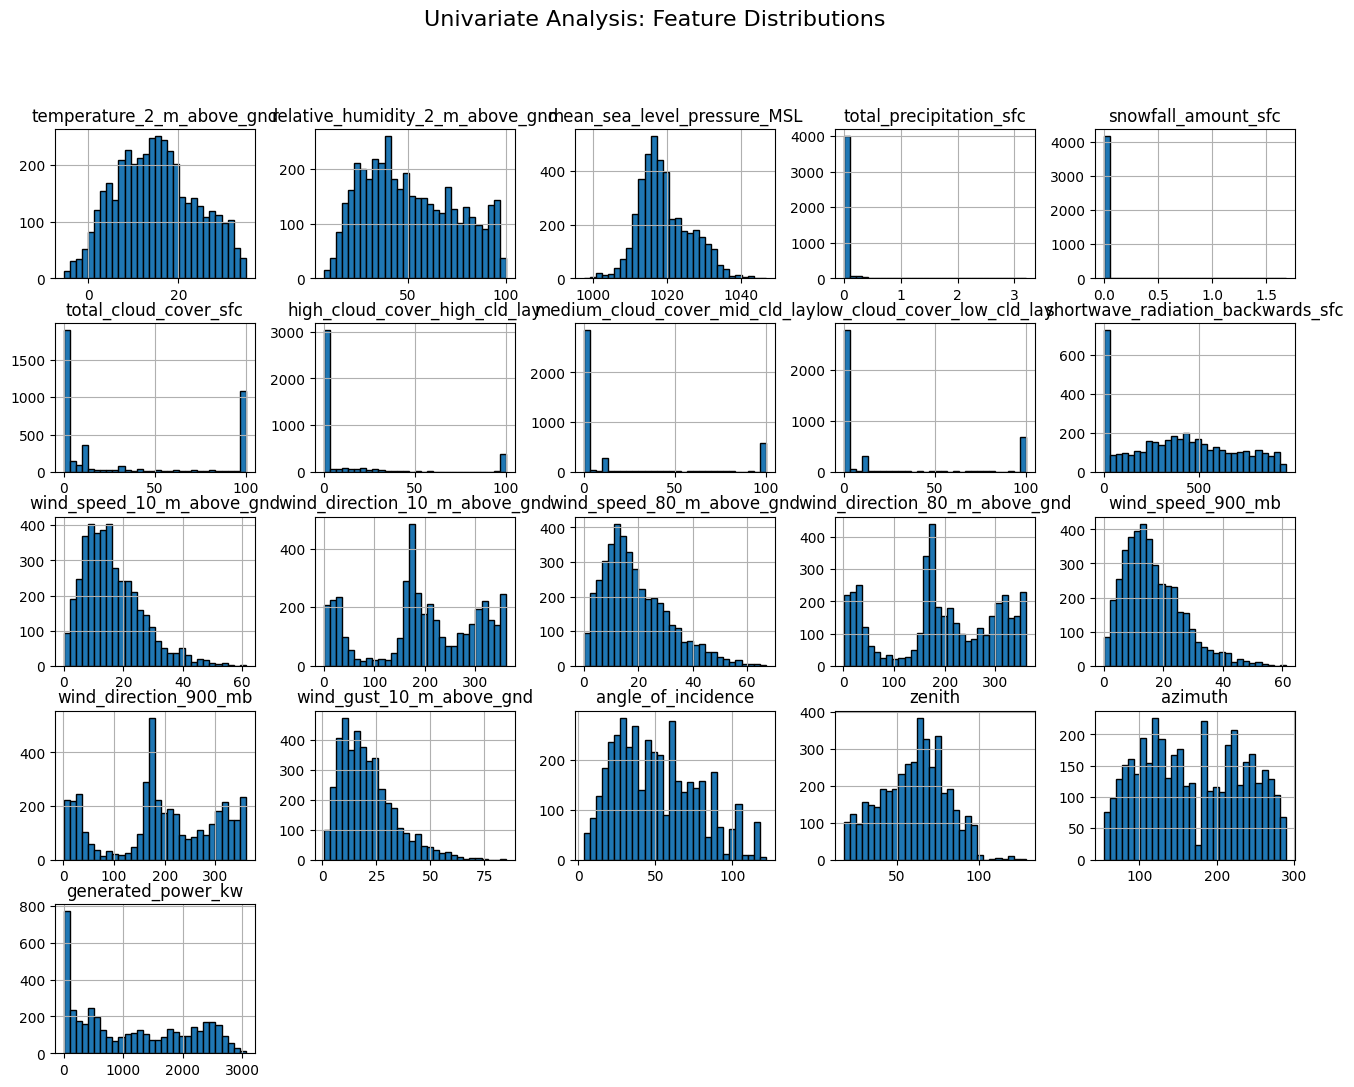

In [13]:
#Histogram distribution for each Variable's frequency
df.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle("Univariate Analysis: Feature Distributions", fontsize=16)
plt.show()

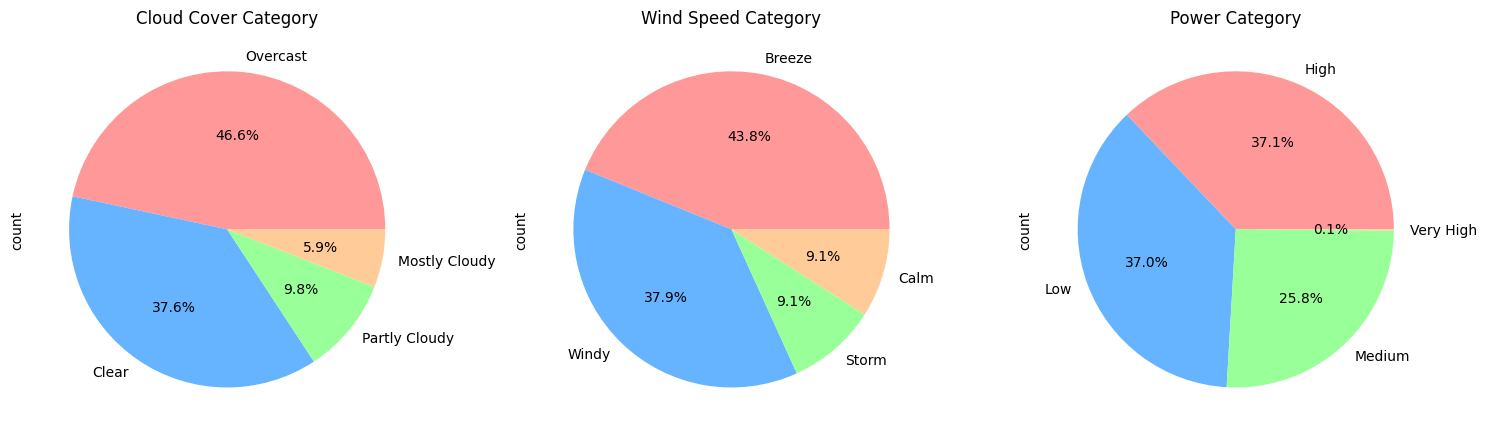

In [14]:
#Pie chart distribution for cloud,wind,power analysis
# Define categories
categories = {
    "Cloud Cover Category": ("total_cloud_cover_sfc", [0, 25, 50, 75, 100], ["Clear", "Partly Cloudy", "Mostly Cloudy", "Overcast"]),
    "Wind Speed Category": ("wind_speed_10_m_above_gnd", [0, 5, 15, 30, 100], ["Calm", "Breeze", "Windy", "Storm"]),
    "Power Category": ("generated_power_kw", [0, 500, 1500, 3000, df["generated_power_kw"].max()], ["Low", "Medium", "High", "Very High"])
}

# Apply categorization
for key, (col, bins, labels) in categories.items():
    df[key] = pd.cut(df[col], bins=bins, labels=labels)

# Plot pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, (key, _) in zip(axes, categories.items()):
    df[key].value_counts().plot.pie(autopct="%1.1f%%", ax=ax, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"])
    ax.set_title(key)

plt.tight_layout()
plt.show()

**BIVARIATE ANAYSIS**

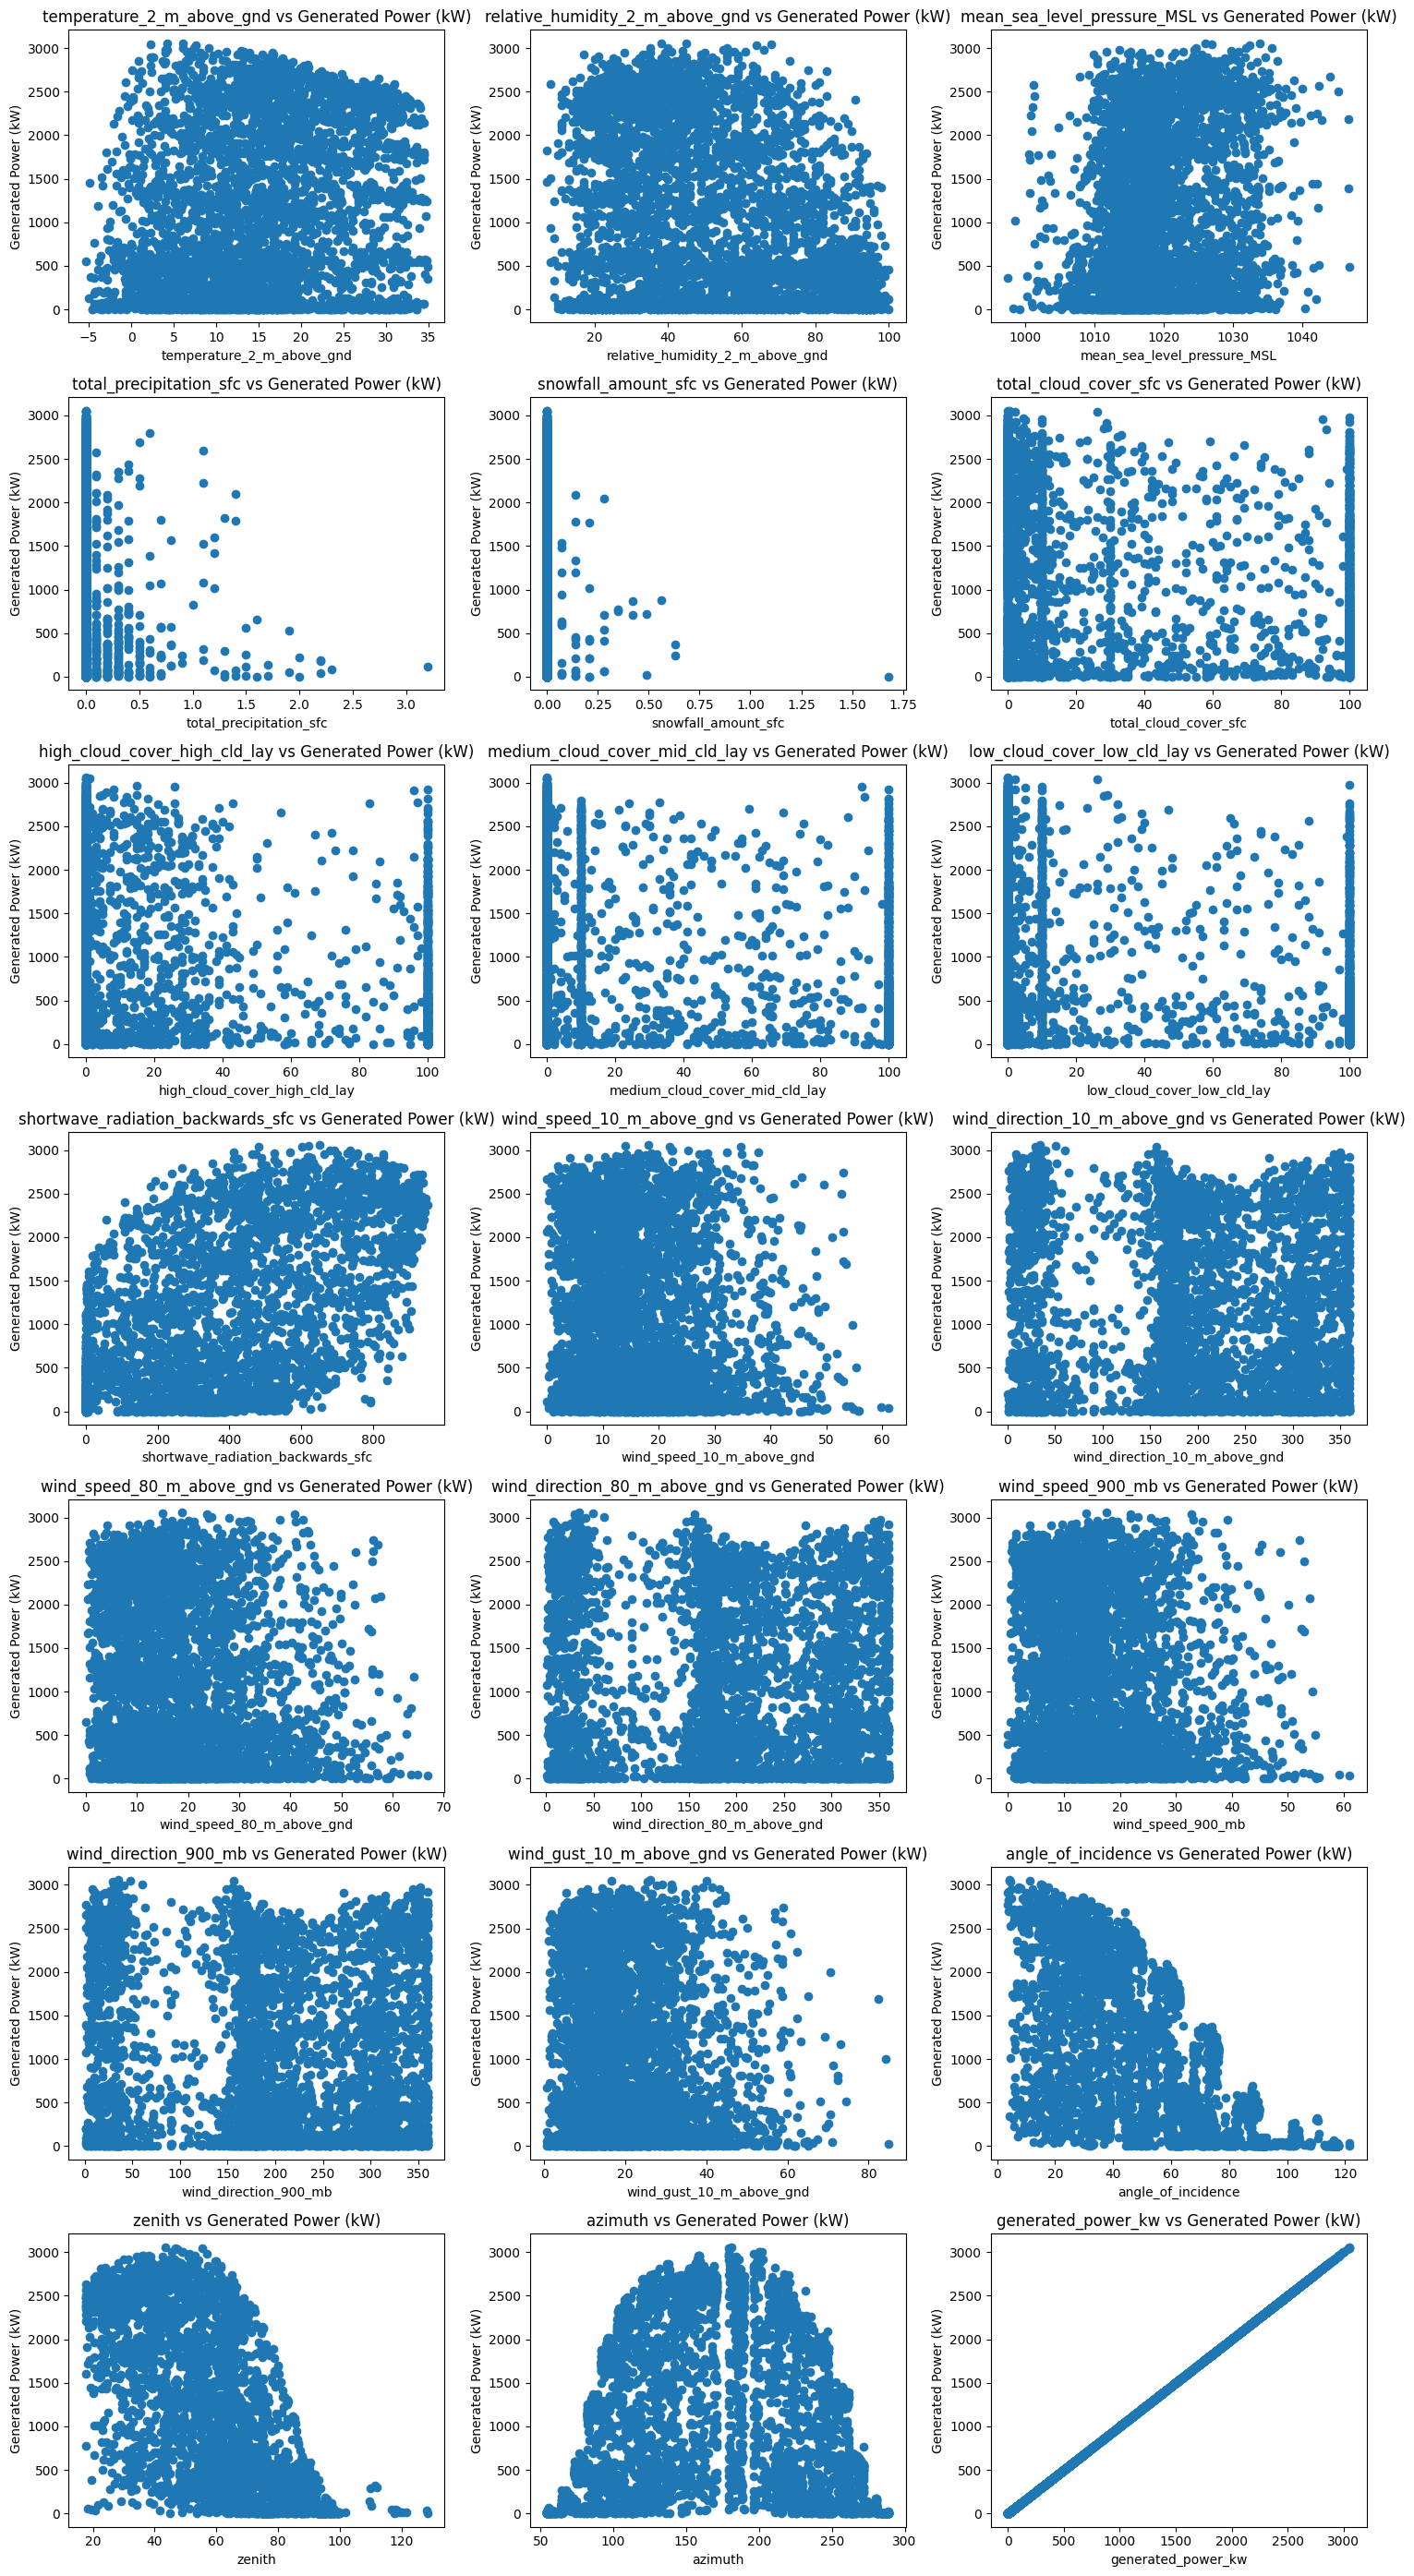

In [16]:
# Bivariate analysis
# Scatter plot with target feature
import math
numeric_cols = df.select_dtypes(include=['number']).columns
num_cols = len(numeric_cols)
num_rows = math.ceil(num_cols / 3)

plt.figure(figsize=(15, num_rows * 4))
for i, column in enumerate(numeric_cols):
    plt.subplot(num_rows, 3, i+1)
    plt.scatter(df[column], df['generated_power_kw'])
    plt.title(f'{column} vs Generated Power (kW)')
    plt.xlabel(column)
    plt.ylabel('Generated Power (kW)')
plt.tight_layout()
plt.show()


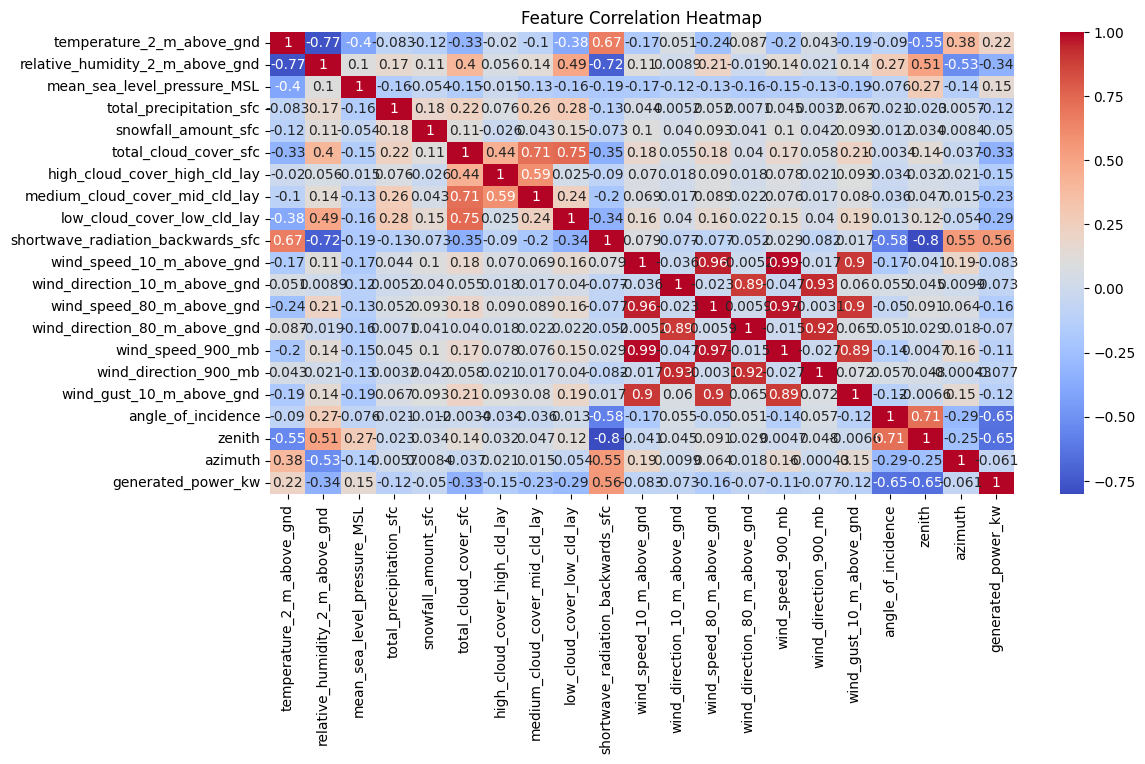

In [ ]:
#Feature correlation analysis 
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix and plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**MULTIVARIATE ANALYSIS**

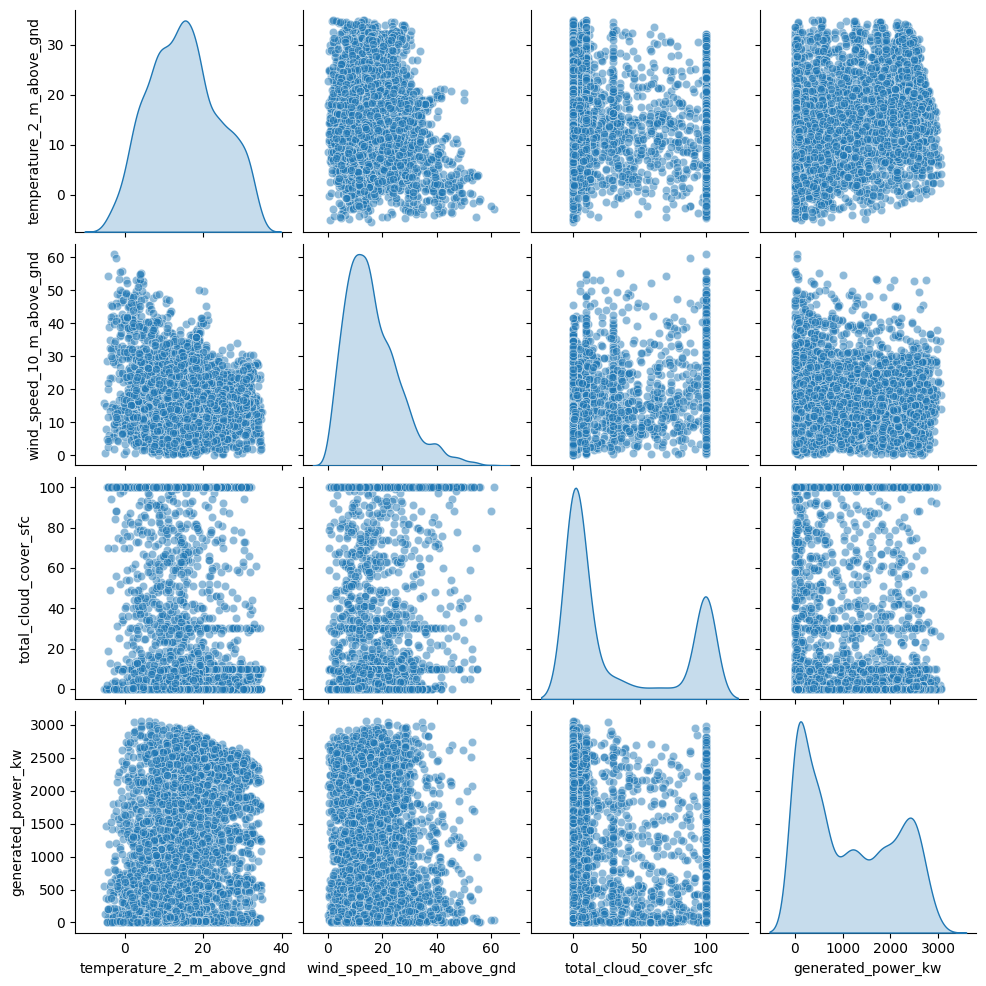

In [ ]:
# Pair Plot: Relationship between Key Variables
selected_features = ['temperature_2_m_above_gnd', 'wind_speed_10_m_above_gnd', 'total_cloud_cover_sfc', 'generated_power_kw']
sns.pairplot(df[selected_features], diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()


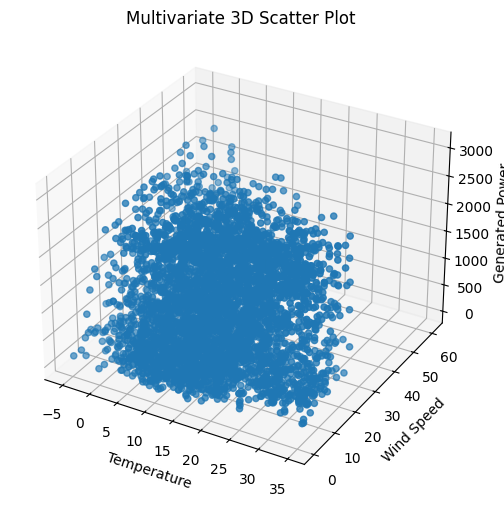

In [23]:
# 3D Scatter Plot temperature vs humidity vs generated power
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["temperature_2_m_above_gnd"], df["wind_speed_10_m_above_gnd"], df["generated_power_kw"])
ax.set_xlabel("Temperature")
ax.set_ylabel("Wind Speed")
ax.set_zlabel("Generated Power")
plt.title("Multivariate 3D Scatter Plot")
plt.show()


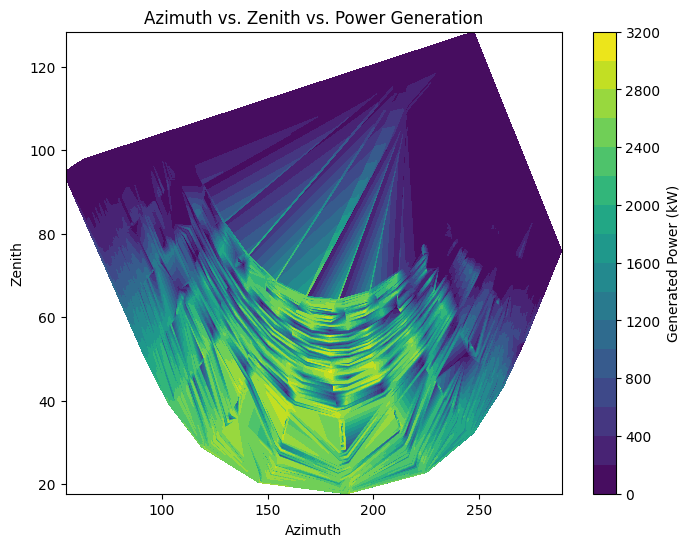

In [24]:
# Contour Plot: Azimuth vs Zenith vs Power Generation
plt.figure(figsize=(8, 6))
x = df['azimuth']
y = df['zenith']
z = df['generated_power_kw']

# Create a grid
xi, yi = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
zi = plt.tricontourf(x, y, z, levels=15, cmap='viridis')

plt.colorbar(label='Generated Power (kW)')
plt.xlabel('Azimuth')
plt.ylabel('Zenith')
plt.title('Azimuth vs. Zenith vs. Power Generation')
plt.show()
